### EDA 데이터 분석

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline

In [3]:
train=pd.read_csv('train.csv')
train.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.7,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7


In [6]:
def check_missing_col(dataframe):
    counted_missing_col=0
    for i,col in enumerate(dataframe.columns):
        missing_values=sum(dataframe[col].isna())
        is_missing=True if missing_values>= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 칼럼은:{col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')
        
        if i==len(dataframe.columns)-1 and counted_missing_col==0:
            print('결측치가 존재하지 않습니다')
check_missing_col(train)

결측치가 존재하지 않습니다


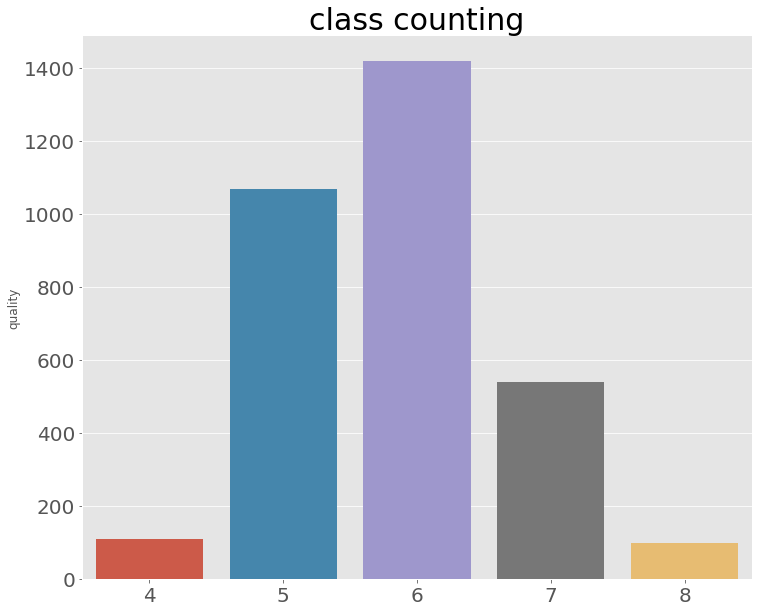

In [7]:
counted_values=train['quality'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(12,10))
plt.title('class counting', fontsize=30)
value_bar_ax=sns.barplot(x=counted_values.index,y=counted_values)
value_bar_ax.tick_params(labelsize=20)

In [12]:
qualities={}
for i in range(4,9):
    quality_description = train[train['quality']== i].drop(
        ['id','quality'],axis=1).describe()
    if i==4:
        means=pd.DataFrame({i:quality_description.loc['mean']})
    else:
        mean=pd.DataFrame({i:quality_description.loc['mean']})
        means=pd.concat([means,mean],axis=1)
means=means.T

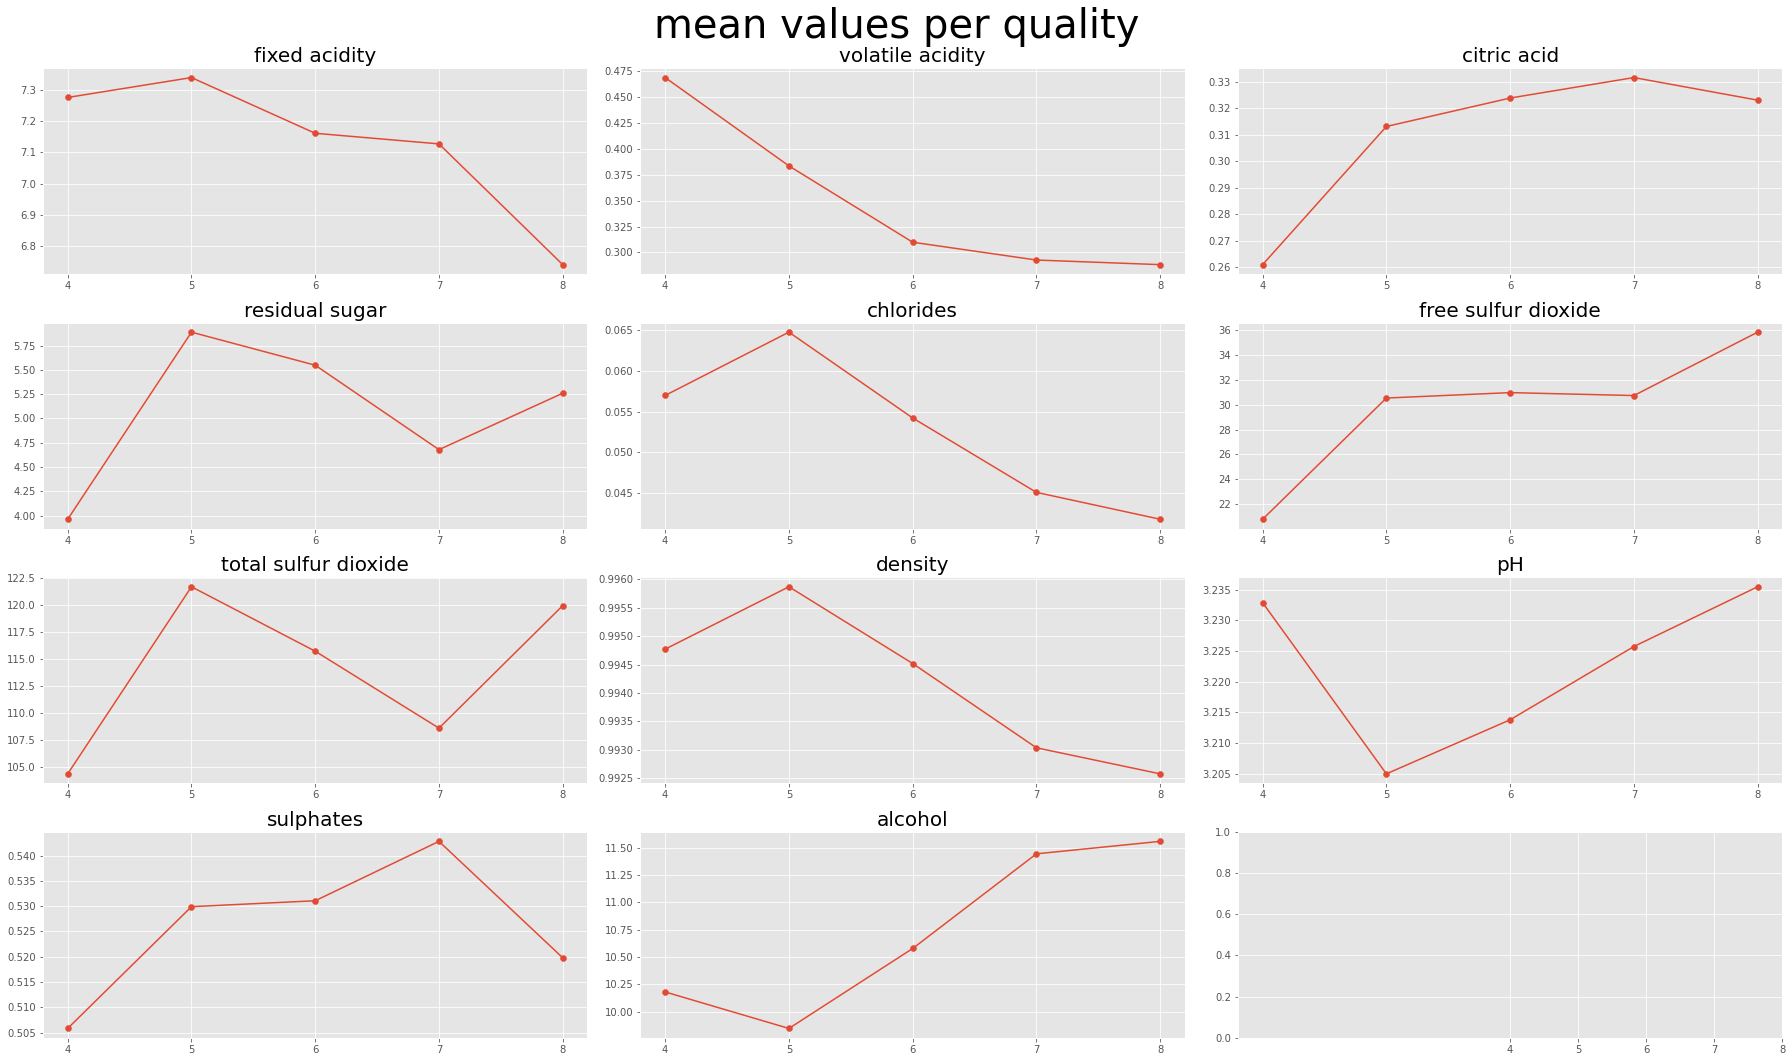

In [15]:
fig,axes=plt.subplots(4,3,figsize=(25,15))

fig.suptitle('mean values per quality', fontsize=40)
for ax,col in zip(axes.flat,means.columns):
    ax.plot([4,5,6,7,8],means[col])
    ax.scatter([4,5,6,7,8],means[col])
    ax.set_title(col,fontsize=20)
plt.setp(axes,xticks=[4,5,6,7,8])
plt.tight_layout()
plt.show()

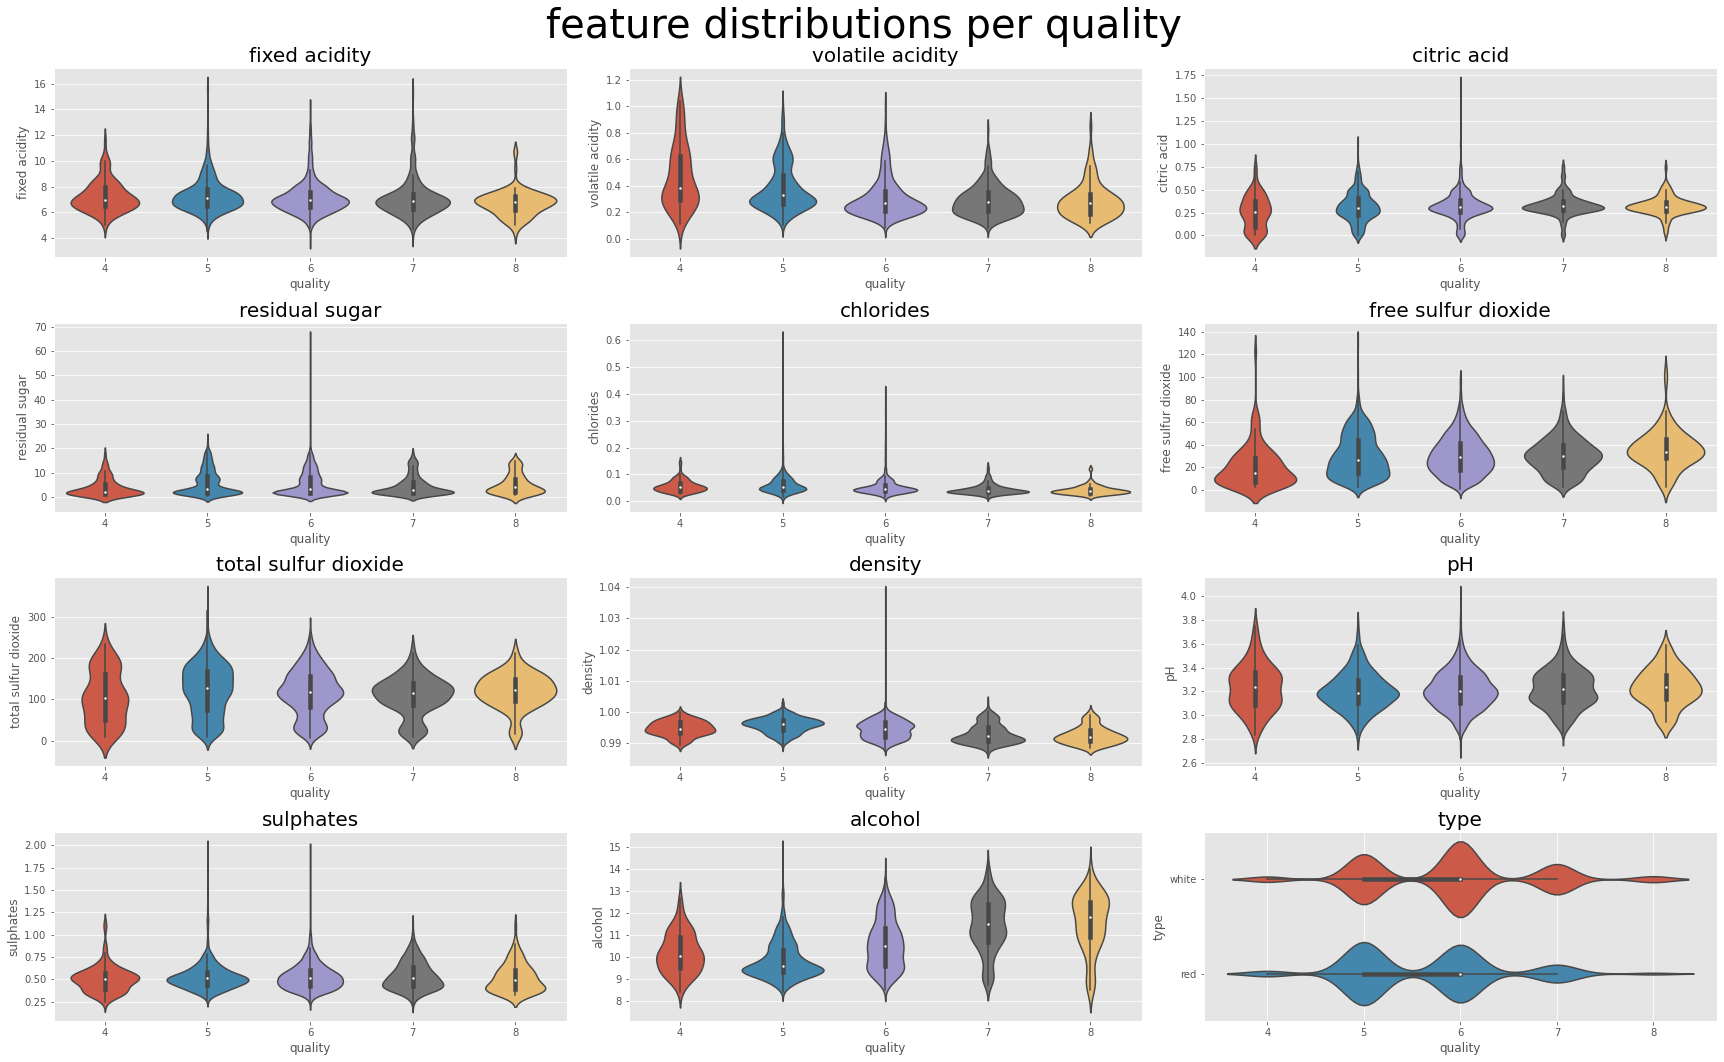

In [25]:
fig, axes= plt.subplots(4,3,figsize=(24,15))

fig.suptitle('feature distributions per quality',fontsize=40)
for ax, col in zip(axes.flat,train.columns[1:]):
    sns.violinplot(x='quality',y=col,ax=ax,data=train)
    ax.set_title(col,fontsize=20)
plt.tight_layout()
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'settitle'

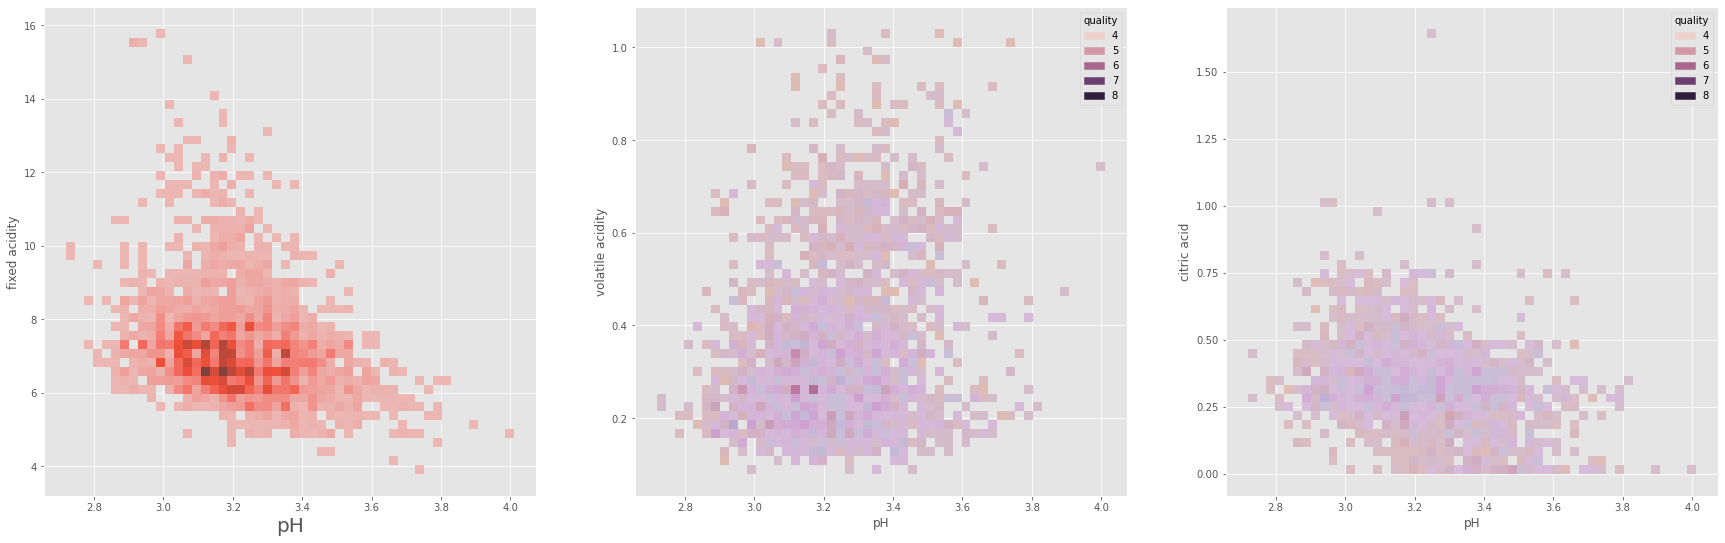

In [28]:
sns.color_palette('Set2')
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(30,9))

scatter_fix=sns.histplot(data=train,x='pH',y='fixed acidity', bins=50,ax=ax1)
scatter_volatile=sns.histplot(data=train,x='pH',y='volatile acidity',bins=50,ax=ax2,hue='quality')
scatter_citric=sns.histplot(data=train,x='pH',y='citric acid',bins=50,ax=ax3,hue='quality')
scatter_fix.set_xlabel('pH',fontsize=20)

ax1.settitle()
fig.suptitle('pH & acid hist plot', fontsize = 40)

plt.show()

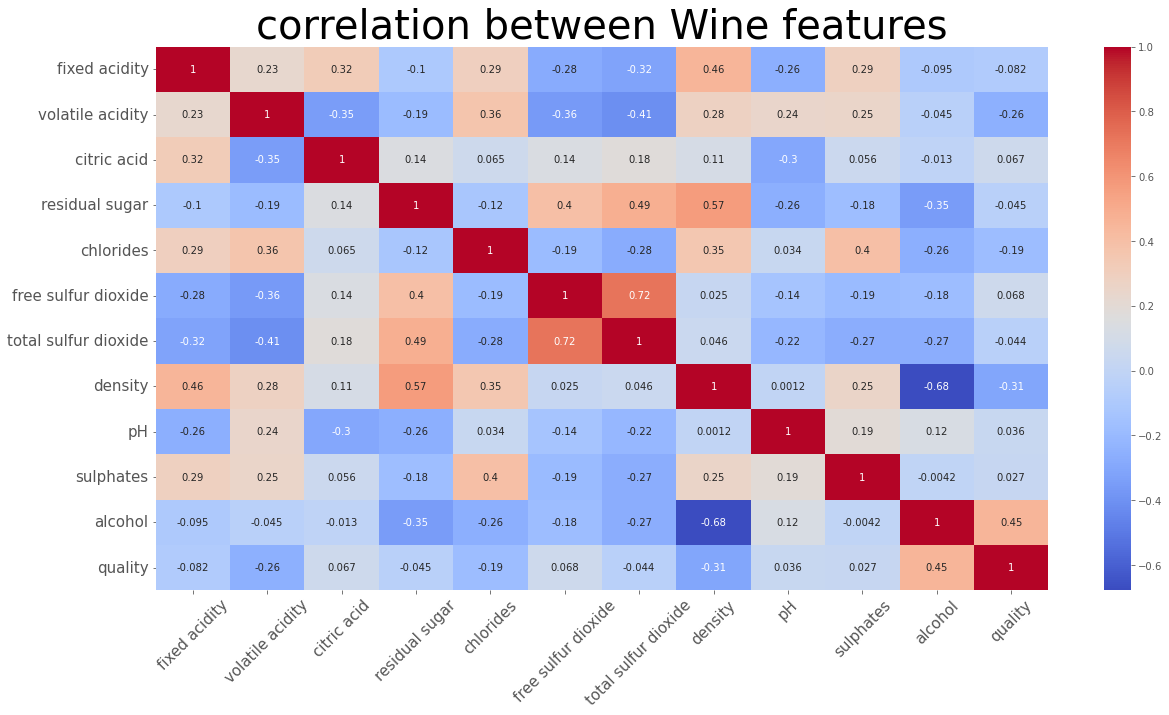

In [29]:
plt.figure(figsize=(20,10))

heat_table=train.drop(['id'],axis=1).corr()
heatmap_ax = sns.heatmap(heat_table,annot=True,cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(),fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(),fontsize=15)
plt.title('correlation between Wine features',fontsize=40)
plt.show()

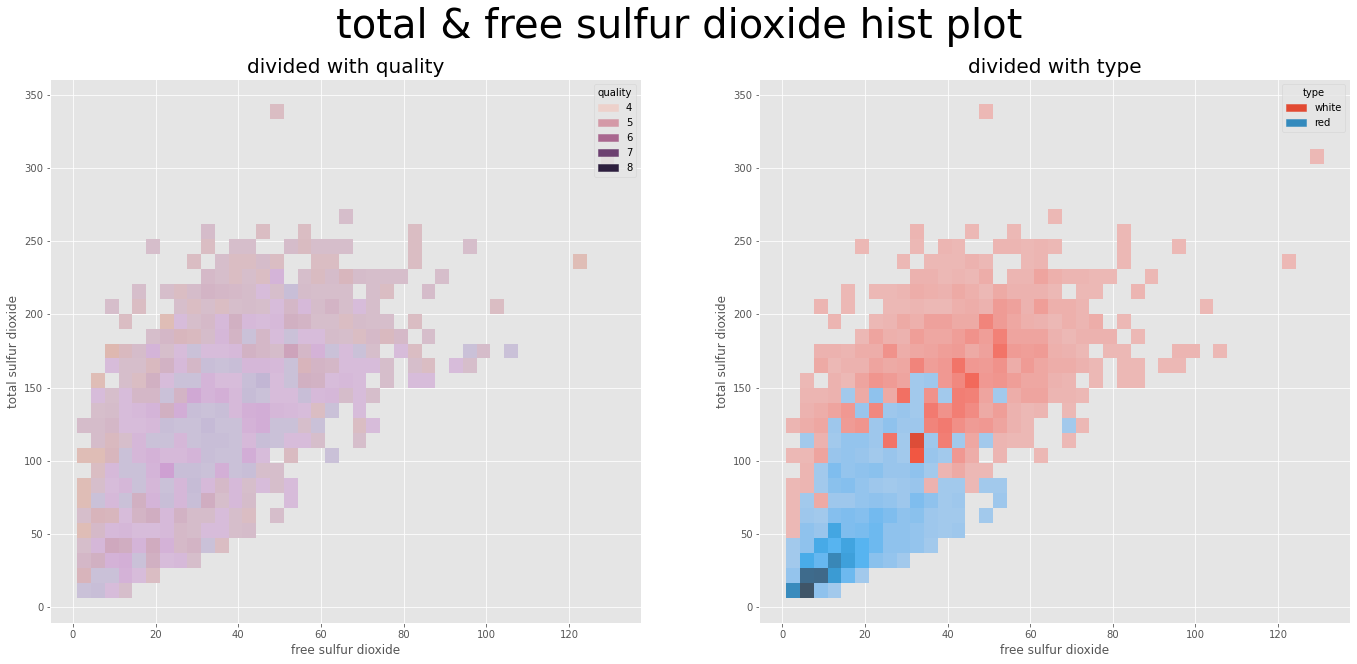

In [30]:
fig, axes= plt.subplots(1,2,figsize=(2.33*10, 1*10))

for i,ax in enumerate(axes):
    if i==0:
        sns.histplot(x='free sulfur dioxide', y='total sulfur dioxide',
                    ax=ax,hue='quality',data=train)
    else:
        sns.histplot(x='free sulfur dioxide',y='total sulfur dioxide',
                    ax=ax, hue='type', data=train)

axes[0].set_title('divided with quality', fontsize=20)
axes[1].set_title('divided with type', fontsize=20)
fig.suptitle('total & free sulfur dioxide hist plot', fontsize=40)
plt.show()

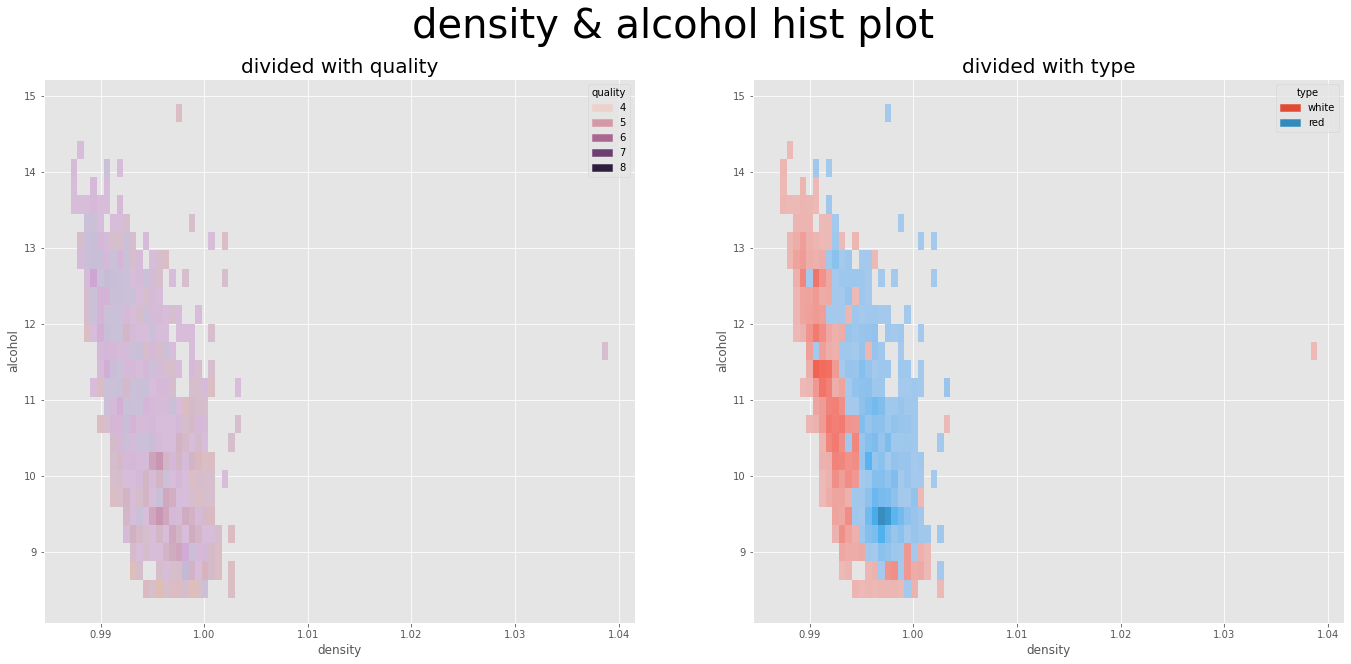

In [31]:
fig, axes= plt.subplots(1,2,figsize=(2.33*10,1*10))

for i,ax in enumerate(axes):
    if i==0:
        sns.histplot(x='density',y='alcohol',ax=ax,hue='quality',data=train)
    else:
        sns.histplot(x='density',y='alcohol',ax=ax,hue='type',data=train)
        
axes[0].set_title('divided with quality',fontsize=20)
axes[1].set_title('divided with type',fontsize=20)
fig.suptitle('density & alcohol hist plot',fontsize=40)
plt.show()

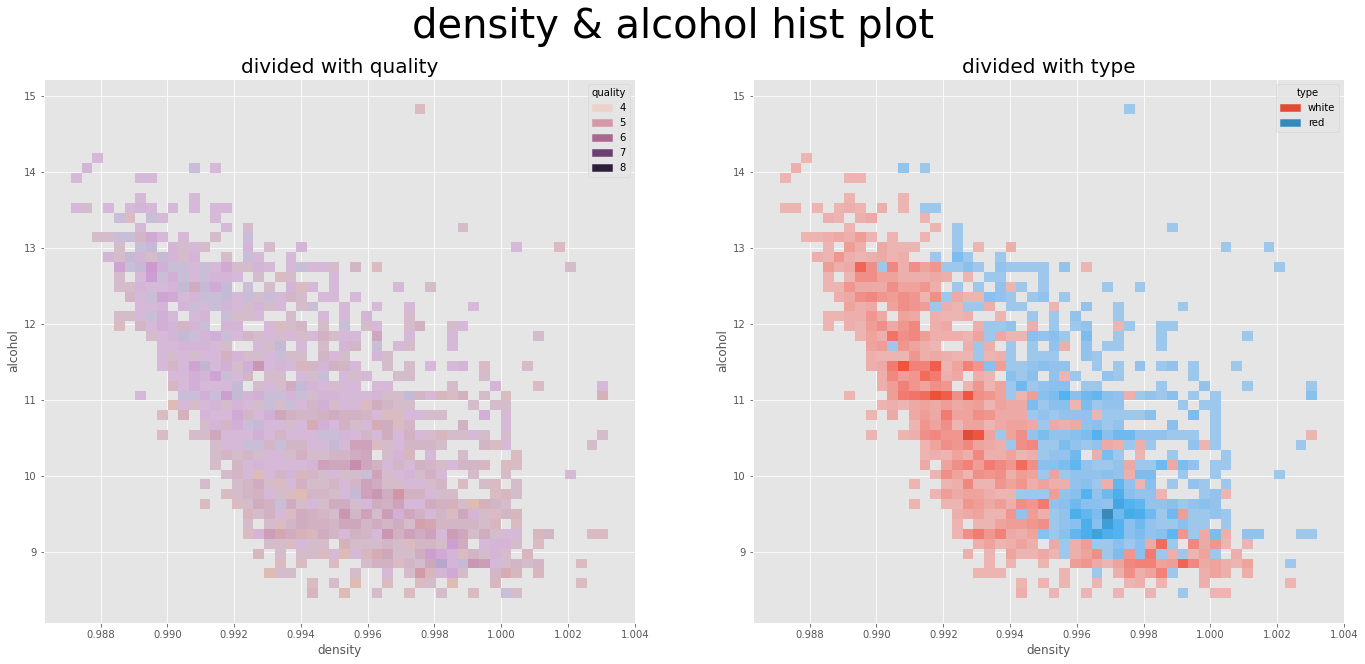

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(2.33 * 10, 1 * 10))

for i, ax in enumerate(axes):
    if i == 0:
        sns.histplot(x= 'density', y= 'alcohol', ax= ax, bins=50, hue= 'quality',data= train.drop(train[train['density'] == max(train['density'])].index))
    else:
        sns.histplot(x= 'density', y= 'alcohol', ax= ax, bins=50, hue= 'type',data= train.drop(train[train['density'] == max(train['density'])].index))
        
axes[0].set_title('divided with quality', fontsize=20)
axes[1].set_title('divided with type', fontsize=20)
fig.suptitle('density & alcohol hist plot', fontsize= 40)
plt.show()

### 데이터 분석 및 예측

In [34]:
import pandas as pd

In [35]:
train=pd.read_csv('train.csv')
train

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,10.5,white,5
3227,3228,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5,white,6
3228,3229,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,white,5
3229,3230,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,10.5,white,6


In [36]:
word_to_num={'white':0,'red':1}
train['type']=train['type'].replace(word_to_num)
train

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,0,6
1,2,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,0,7
2,3,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,0,6
3,4,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,0,5
4,5,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,10.5,0,5
3227,3228,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5,0,6
3228,3229,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,0,5
3229,3230,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,10.5,0,6


In [38]:
X=train.drop(['id','quality'],axis=1)
y=train['quality']

In [39]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='liblinear')
model.fit(X,y)

LogisticRegression(solver='liblinear')

In [41]:
import numpy as np

def ACCURACY(true,pred):
    score=np.mean(true==pred)
    return score

In [42]:
prediction=model.predict(X)
score=ACCURACY(y,prediction)
print(score)

0.5416279789538843


In [44]:
from collections import Counter

pred_cnt=Counter(prediction)
true_cnt=Counter(y)

for key in sorted(true_cnt.keys()):
    print(f'{key} 값 예측 개수:{pred_cnt[key]}개, 실제 값 개수:{true_cnt[key]}개')

4 값 예측 개수:0개, 실제 값 개수:108개
5 값 예측 개수:1090개, 실제 값 개수:1069개
6 값 예측 개수:2050개, 실제 값 개수:1418개
7 값 예측 개수:91개, 실제 값 개수:539개
8 값 예측 개수:0개, 실제 값 개수:97개


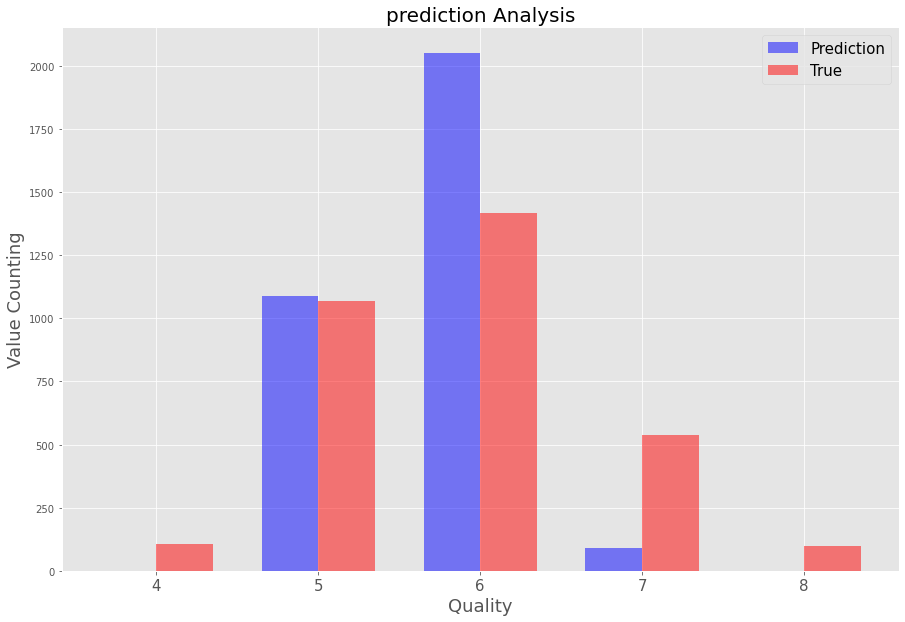

In [45]:
import matplotlib.pyplot as plt

index=sorted(true_cnt.keys())
pred_val=[pred_cnt[key] for key in index]
true_val=[true_cnt[key] for key in index]

plt.figure(figsize=(15,10))
bar_width=0.35
p1=plt.bar([idx-bar_width/2 for idx in index], pred_val, bar_width, color='b',
          alpha=0.5)
p2=plt.bar([idx+bar_width/2 for idx in index], true_val, bar_width, color='r',
          alpha=0.5)
plt.title('prediction Analysis', fontsize=20)
plt.ylabel('Value Counting',fontsize=18)
plt.xlabel('Quality', fontsize=18)
plt.xticks(index,fontsize=15)
plt.legend((p1[0],p2[0]), ('Prediction','True'),fontsize=15)
plt.show()

In [46]:
accurate = y[y==prediction]
print("정답을 맞춘 개수 : ", len(accurate))

accu_cnt = Counter(accurate)
true_cnt = Counter(y)

for key in sorted(true_cnt.keys()):
    print(f"{key} 값 예측 개수: {accu_cnt[key]}개, 실제 값 개수: {true_cnt[key]}개, 정답률: {accu_cnt[key]/true_cnt[key]*100:.2f}%")

정답을 맞춘 개수 :  1750
4 값 예측 개수: 0개, 실제 값 개수: 108개, 정답률: 0.00%
5 값 예측 개수: 642개, 실제 값 개수: 1069개, 정답률: 60.06%
6 값 예측 개수: 1056개, 실제 값 개수: 1418개, 정답률: 74.47%
7 값 예측 개수: 52개, 실제 값 개수: 539개, 정답률: 9.65%
8 값 예측 개수: 0개, 실제 값 개수: 97개, 정답률: 0.00%


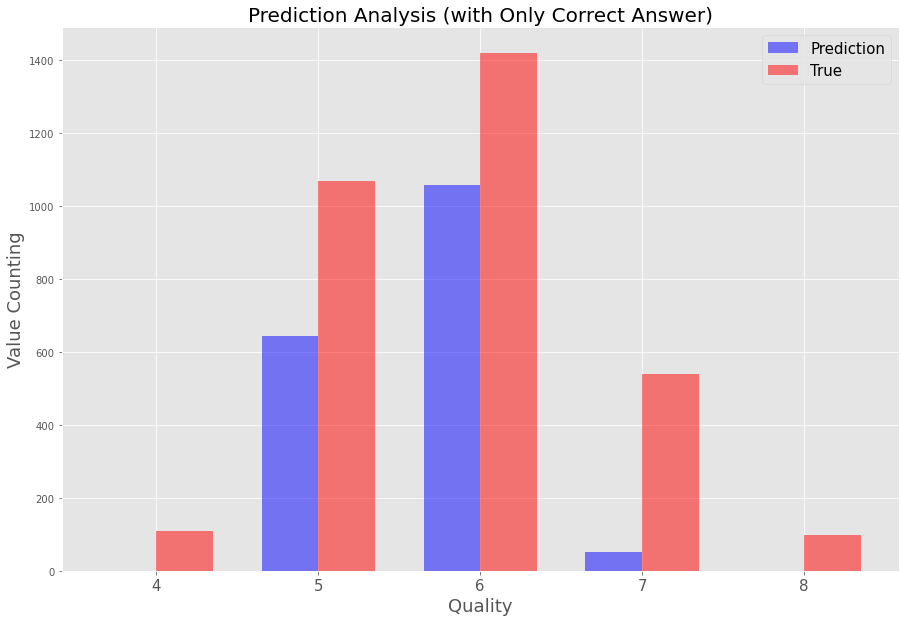

In [48]:
index = sorted(true_cnt.keys())
accu_val = [accu_cnt[key] for key in index]
true_val = [true_cnt[key] for key in index]

plt.figure(figsize=(15,10))
bar_width = 0.35
p1 = plt.bar([idx-bar_width/2 for idx in index], accu_val, 
             bar_width, 
             color='b', 
             alpha=0.5)
p2 = plt.bar([idx+bar_width/2 for idx in index], true_val, 
             bar_width, 
             color='r', 
             alpha=0.5)
plt.title('Prediction Analysis (with Only Correct Answer)', fontsize=20)
plt.ylabel('Value Counting', fontsize=18)
plt.xlabel('Quality', fontsize=18)
plt.xticks(index, fontsize=15)
plt.legend((p1[0], p2[0]), ('Prediction', 'True'), fontsize=15)
plt.show()